

<div style="padding: 60px;
  text-align: center;
  background: #d4afb9;
  color: #003049;
  font-size: 20px;">
  <h1>🖥️ AI-Powered Financial Insights</h1>
  <h3>Harnessing LLMs for a Competitive Edge in the Market</h3>
   <hr>
   <h5>🔬 Develop by Dwi Gustin Nurdialit</h5>
</div>

___

## Getting Started

### What is AI-Powered Financial Insight?

Di era modern ini, data keuangan semakin kompleks dan jumlahnya sangat besar. Untuk memahami data tersebut secara cepat dan akurat, kita bisa menggunakan teknologi **AI-powered financial insight**, yaitu pendekatan analisis data keuangan dengan bantuan kecerdasan buatan, khususnya **Large Language Models (LLMs)**.

Dengan menggunakan AI, kita bisa:

* Mengambil ringkasan laporan keuangan secara otomatis.
* Menjelaskan tren yang terlihat pada grafik keuangan.
* Mendeteksi potensi risiko keuangan hanya dari data mentah.

Tujuan akhirnya adalah membantu kita membuat keputusan yang lebih baik, lebih cepat, dan berdasarkan data yang solid.

### Why Use Large Language Models (LLMs) in Finance?

LLM (Large Language Model) adalah model AI yang dilatih dengan jutaan data teks, sehingga mampu memahami dan menghasilkan teks seperti manusia. Kita mungkin mengenal ChatGPT, Groq, atau Claude sebagai contoh LLM.

Dalam konteks keuangan, LLM sangat bermanfaat karena:

* Dapat membaca dan memahami laporan keuangan berbahasa natural.
* Menjawab pertanyaan tentang kondisi keuangan suatu perusahaan.
* Menginterpretasikan grafik seperti tren revenue atau cash flow.
* Menghasilkan insight keuangan secara otomatis tanpa perlu coding kompleks.

Dengan kata lain, LLM membuat analisis keuangan menjadi lebih **mudah, cepat, dan efisien**, bahkan untuk kita yang tidak punya latar belakang finansial maupun teknis.

### The Workflow: A Roadmap from Raw Data to Interactive Dashboard

Berikut adalah alur kerja (workflow) yang akan kita gunakan sepanjang course ini:

1. **Ambil Data Keuangan**
   Mengambil data dari Sectors API menggunakan Python.

2. **Eksplorasi dan Persiapan Data**
   Data yang kita ambil akan dibersihkan dan disiapkan agar bisa dibaca oleh AI.

3. **Analisis dengan LLM**
   Menggunakan LangChain dan Groq untuk menghasilkan insight secara otomatis.

4. **Visualisasi Data**
   Membuat grafik yang memperlihatkan tren keuangan menggunakan AI.

5. **Bangun Dashboard**
   Membangun dashboard interaktif menggunakan Streamlit dan menampilkan hasil analisis AI secara langsung.

### Tools and Technologies Overview

Untuk menyelesaikan course ini, kita akan menggunakan beberapa tools berikut:

- **Python**: Bahasa pemrograman utama yang akan kita gunakan. Mudah dipahami, fleksibel, dan banyak digunakan dalam analisis data serta AI
- **Jupyter Notebook**: Tempat kita akan menulis dan menjalankan kode Python. Sangat cocok untuk eksperimen data dan dokumentasi proses analisis.
- **Streamlit**: Framework Python untuk membuat aplikasi web secara cepat. Kita akan menggunakannya untuk membangun dashboard dari data dan insight yang kita miliki.
- **LangChain**: Framework yang memudahkan kita menghubungkan LLM dengan data.
- **Groq**: Salah satu penyedia LLM yang sangat cepat dan efisien. Keduanya akan digunakan untuk menghasilkan insight otomatis dari data keuangan.
- **Sectors API**: Sumber data keuangan yang akan kita gunakan. Dengan API ini, kita bisa mengambil data tentang perusahaan, laporan keuangan, dan informasi sektor industri secara real time.

# Getting Financial Data via API

Data keuangan adalah pondasi dari semua insight yang akan kita hasilkan. Di bagian ini, kita akan belajar bagaimana cara mengambil data keuangan secara otomatis menggunakan **API** — semacam jembatan digital yang menghubungkan kita dengan data real-time dari internet.

## 🔌 What is an API and How It Works

**API (Application Programming Interface)** adalah jembatan yang memungkinkan dua aplikasi berkomunikasi. Bayangkan seperti kita memesan makanan lewat aplikasi, dan restoran mengantarkan pesanan ke rumah — konsep yang sama berlaku saat kita minta data ke server melalui API.

🔁 Cara kerjanya:

* Kita kirim **request** (permintaan data)
* Server API membalas dengan **response** (data, biasanya dalam format JSON)

## 🌐 Introduction to the Sectors API

[Sectors API](https://sectors.app/api) adalah layanan yang menyediakan berbagai informasi terkait sektor industri dan keuangan perusahaan. 

Anggap saja ini sebagai perpustakaan atau sumber data utama kita.Kita bisa melihat semua "menu" data yang tersedia di dokumentasi resmi mereka: https://sectors.app/api

* Melihat daftar subsektor industri
* Mengambil daftar perusahaan berdasarkan subsektor
* Mengakses data keuangan mereka
* dll

## 🔑 Step 1: Obtaining Your Personal API Key

Untuk menggunakan Sectors API, kita perlu mendaftar dan mendapatkan **API Key** sebagai tanda pengenal kita.

📝 Langkah-langkah:

1. Kunjungi [sectors.app/api](https://sectors.app/api)
2. Login atau daftar akun
3. Salin API Key Anda

Kita akan menyimpan API Key ini agar bisa digunakan nanti dalam kode Python.

## ⚙️ Step 2: Setting Up Your Python Environment

### Menyimpan API Key dengan Aman

Agar API Key kita aman dan tidak terlihat langsung dalam kode, kita akan menyimpannya dalam file `.env`. Untuk membaca file ini, kita gunakan library `dotenv`.

In [1]:
from dotenv import load_dotenv
import os

Gunakan `load_dotenv()` untuk memuat semua variabel dari file .env kita.

In [2]:
load_dotenv()

True

Sekarang, kita ambil key tersebut dari environment dan simpan dalam variabel. Gunakan `os.getenv("NAMA_VARIABEL")` untuk "ambil nilai dari variabel X"

In [3]:
SECTORS_API_KEY = os.getenv("SECTORS_API_KEY")

### Menyiapkan Akses Cepat

Supaya lebih mudah, kita akan menyimpan alamat utama API dan header otorisasi kita dalam variabel. Jadi, kita tidak perlu mengetiknya berulang kali.

In [4]:
BASE_URL = "https://api.sectors.app/v1"
HEADERS = {"Authorization": SECTORS_API_KEY}

> 💡 `BASE_URL` menyimpan alamat utama API, dan `HEADERS` menyimpan API Key yang akan dikirim saat kita melakukan permintaan ke API.

## 📥 Step 3: Extracting and Loading Financial Data
### 🔍 Subsector

Sebagai contoh awal, kita akan mengambil daftar subsektor industri dari API:


Import library '`requests`' yang berfungsi sebagai "kurir" untuk mengirim permintaan kita

In [5]:
import requests

Kita tentukan alamat lengkap pesanan kita berdasarkan dokumentasi. Gunakan `f"{...}"` untuk mempermudah menggabungkan string di Python.

In [6]:
url_subsectors = f"{BASE_URL}/subsectors/"

Sekarang kita kirim permintaannya!

- Gunakan `requests.get()` -> perintah untuk "Tolong ambilkan data dari URL ini".
- Kita juga menyertakan `HEADERS` agar server tahu siapa kita.

In [7]:
resp = requests.get(url_subsectors, headers=HEADERS)

In [8]:
resp

<Response [200]>

`resp` sekarang berisi jawaban dari server. Untuk melihat isinya dalam format yang bisa dibaca Python, kita gunakan `.json()`.

In [9]:
resp.json()

[{'sector': 'transportation-logistic', 'subsector': 'transportation'},
 {'sector': 'infrastructures', 'subsector': 'telecommunication'},
 {'sector': 'infrastructures',
  'subsector': 'heavy-constructions-civil-engineering'},
 {'sector': 'properties-real-estate', 'subsector': 'properties-real-estate'},
 {'sector': 'consumer-non-cyclicals', 'subsector': 'food-beverage'},
 {'sector': 'infrastructures', 'subsector': 'utilities'},
 {'sector': 'healthcare', 'subsector': 'healthcare-equipment-providers'},
 {'sector': 'financials', 'subsector': 'financing-service'},
 {'sector': 'consumer-non-cyclicals', 'subsector': 'tobacco'},
 {'sector': 'healthcare', 'subsector': 'pharmaceuticals-health-care-research'},
 {'sector': 'consumer-non-cyclicals',
  'subsector': 'nondurable-household-products'},
 {'sector': 'consumer-cyclicals', 'subsector': 'media-entertainment'},
 {'sector': 'industrials', 'subsector': 'industrial-goods'},
 {'sector': 'consumer-non-cyclicals', 'subsector': 'food-staples-retailin

Lalu ubah menjadi `DataFrame` agar mudah dianalisis:

In [10]:
import pandas as pd

subsectors_df = pd.DataFrame(resp.json())
subsectors_df.head()

,sector,subsector
0,transportation-logistic,transportation
1,infrastructures,telecommunication
2,infrastructures,heavy-constructions-civil-engineering
3,properties-real-estate,properties-real-estate
4,consumer-non-cyclicals,food-beverage


In [11]:
subsectors_df["subsector"].sort_values().tolist()

['alternative-energy',
 'apparel-luxury-goods',
 'automobiles-components',
 'banks',
 'basic-materials',
 'consumer-services',
 'financing-service',
 'food-beverage',
 'food-staples-retailing',
 'healthcare-equipment-providers',
 'heavy-constructions-civil-engineering',
 'holding-investment-companies',
 'household-goods',
 'industrial-goods',
 'industrial-services',
 'insurance',
 'investment-service',
 'leisure-goods',
 'logistics-deliveries',
 'media-entertainment',
 'multi-sector-holdings',
 'nondurable-household-products',
 'oil-gas-coal',
 'pharmaceuticals-health-care-research',
 'properties-real-estate',
 'retailing',
 'software-it-services',
 'technology-hardware-equipment',
 'telecommunication',
 'tobacco',
 'transportation',
 'transportation-infrastructure',
 'utilities']

### 🏢 Companies

Selanjutnya, kita akan mengambil daftar perusahaan berdasarkan subsektor. Misalnya kita ingin melihat perusahaan di subsektor **banks**:

Tentukan alamat perusahaan

In [12]:
url_companies = f"{BASE_URL}/companies/"

Kita perlu menambahkan "catatan khusus" pada pesanan kita. Di API, ini disebut '`params`' (parameter).

In [13]:
selected_subsector = "banks"
params = {"sub_sector": selected_subsector}

Kirim pesanan

In [14]:
resp = requests.get(url_companies, headers=HEADERS, params=params)

Ubah menjadi `dataframe`:

In [15]:
companies_df = pd.DataFrame(resp.json())
companies_df.head()

,symbol,company_name,sorted_by
0,AGRO.JK,PT Bank Raya Indonesia Tbk,AGRO.JK
1,AGRS.JK,PT Bank IBK Indonesia Tbk.,AGRS.JK
2,AMAR.JK,PT Bank Amar Indonesia Tbk.,AMAR.JK
3,ARTO.JK,PT Bank Jago Tbk.,ARTO.JK
4,BABP.JK,PT Bank MNC Internasional Tbk.,BABP.JK


# 🧠 AI-Powered Analysis with LLMs

Di module sebelumnya, kita sudah berhasil mengambil data dari API. Sekarang, kita akan masuk ke tahap paling seru: **menggunakan AI (Large Language Model)** untuk membaca dan menginterpretasi data keuangan.

LLM memungkinkan kita untuk:

* Membuat ringkasan otomatis dari data
* Menjawab pertanyaan keuangan
* Mendeteksi pola dan risiko

Semua bisa dilakukan hanya dengan beberapa baris kode — dan tentu saja dengan bantuan **prompt** (instruksi berbentuk teks).

**Introduction to AI-Generated Financial Insights**

AI-generated financial insight adalah hasil analisis data keuangan yang dibuat oleh model AI secara otomatis. Dengan bantuan LLM, kita bisa:

* Menyusun ringkasan laporan keuangan 
* Menjelaskan tren grafik 
* Mengubah data menjadi teks yang mudah dimengerti oleh manusia

Ini sangat membantu, terutama untuk kita yang tidak punya latar belakang finansial — karena AI bisa menjelaskan data dalam bahasa yang lebih sederhana dan intuitif.

## 🤖 Why Use AI for Financial Data Interpretation

Data keuangan seringkali bersifat kompleks. Tanpa bantuan AI, kita perlu waktu lama untuk:

* Membaca angka demi angka dari laporan
* Membuat kesimpulan sendiri
* Menyusun insight yang berguna

Dengan LLM, kita cukup menyiapkan data dan menyusun pertanyaan (prompt), lalu biarkan AI yang mengolahnya. Hasilnya bisa berupa:

* Analisis deskriptif
* Penjelasan tren
* Ringkasan performa perusahaan

📌 Ini membuat pekerjaan analis, mahasiswa, bahkan pebisnis jadi jauh lebih cepat dan efisien.

### 🔗 LangChain

[LangChain](https://python.langchain.com/docs/introduction/) adalah framework Python yang memudahkan kita dalam:

* Menyusun prompt
* Menghubungkan LLM dengan data kita
* Menyusun pipeline otomatis dari input hingga output

LangChain sangat cocok untuk membangun alur kerja berbasis LLM, seperti tanya-jawab keuangan, chatbot, atau ringkasan otomatis.

### ⚡ Groq

[Groq](https://console.groq.com/docs/quickstart) adalah layanan yang menyediakan akses ke model-model LLM super cepat seperti LLaMA 3 dan lainnya. Kita akan menggunakan Groq sebagai penyedia model AI-nya.

## ⚙️ Setting Up LangChain and LLMs

Untuk memulai, kita perlu mengimpor dua komponen penting: 

* `langchain_groq`: digunakan untuk menghubungkan LangChain dengan model LLM dari Groq.
* `PromptTemplate`: digunakan untuk membuat format pertanyaan atau instruksi yang ingin kita berikan ke AI.

In [16]:
from langchain_groq import ChatGroq
from langchain.prompts import PromptTemplate

### 🧪 Inisialisasi Model LLM

Sebelum bisa menggunakan LLM, kita perlu menginisiasi model-nya terlebih dahulu. Ini seperti menyalakan mesin sebelum digunakan.

Kita butuh 3 parameter utama:
* `groq_api_key`: API Key dari Groq yang kita simpan di file `.env`. Digunakan untuk otorisasi.
* `model_name`: nama model yang ingin kita gunakan. Di sini kita pakai `"llama3-70b-8192"`, yaitu model besar dan canggih dari Meta yang disediakan Groq. Dokumentasi lengkap model Groq bisa dilihat di: [https://console.groq.com/docs](https://console.groq.com/docs)
* `temperature`: mengatur tingkat kreativitas jawaban.

  * Semakin **rendah** (misalnya 0.0) → jawaban lebih konsisten dan deterministik.
  * Semakin **tinggi** (misalnya 1.0) → jawaban lebih kreatif dan bervariasi.

📌 Kita menggunakan `0.7` agar hasilnya tetap kreatif namun tidak terlalu liar.


In [17]:
GROQ_API_KEY = os.getenv("GROQ_API_KEY")

llm = ChatGroq(
    temperature=0.7,
    model_name="llama3-70b-8192",
    groq_api_key=GROQ_API_KEY 
)

## 🧱 Building a Prompt-Driven Analysis Pipeline

Untuk memahami bagaimana LLM bekerja, mari kita mulai dari contoh **sederhana** di luar konteks keuangan terlebih dahulu.

Kita akan menyusun **prompt** (instruksi), lalu melihat bagaimana LLM merespons.

LangChain menyediakan fungsi `.invoke()` yang digunakan untuk menjalankan model:

In [18]:
# Contoh pemanggilan langsung
response = llm.invoke("Jelaskan apa itu API dalam satu kalimat singkat.")
print(response.content)

API (Application Programming Interface) adalah sebuah sistem yang memungkinkan berbagai aplikasi dan sistem untuk berkomunikasi dan berbagi data dengan cara yang terstruktur dan terstandardisasi.


> 📌 `invoke()` adalah cara cepat untuk meminta jawaban dari LLM berdasarkan prompt (teks perintah) yang kita kirim.

### 📄 Menggunakan Prompt Template

Kalau kita ingin AI melakukan tugas spesifik berdasarkan pola tertentu, kita bisa membuat *template prompt*.

Sebagai contoh, kita akan membuat template yang meminta AI untuk menjelaskan sebuah konsep kepada anak berusia 10 tahun.

**1. Buat Template Prompt**

Gunakan `PromptTemplate` untuk membuat format prompt dengan variabel dinamis. Perhatikan `{topic}`, ini adalah variabel yang bisa kita isi nanti.

In [19]:
template = PromptTemplate(
    input_variables=["topic"],
    template="Jelaskan konsep '{topic}' seolah-olah saya adalah anak berusia 10 tahun dalam satu kalimat."
)

**2. Mengisi Variabel**

Isi variabel dinamis yang sudah kita definisikan sebelumnya menggunakan `.format`


In [20]:
prompt = template.format(topic="Laporan Keuangan Tahunan")

**3. Jalankan LLM**

Untuk menjalankan LLM dengan prompt hasil template, kita menggunakan `.invoke()`

In [21]:
response = llm.invoke(prompt)
response.content

'"Laporan Keuangan Tahunan adalah seperti sebuah buku catatan yang dibuat oleh perusahaan untuk mencatat semua uang yang mereka dapatkan dan uang yang mereka keluarkan selama satu tahun, sehingga mereka dapat melihat apakah mereka untung atau rugi dan membuat rencana yang lebih baik untuk tahun depan!"'

Kini kita punya pemahaman dasar tentang cara memberi instruksi terstruktur kepada AI. Di modul berikutnya, kita akan mengganti `topic` sederhana ini dengan data keuangan sungguhan untuk menghasilkan analisis yang sebenarnya.

Selanjutnya, kita akan menggabungkan **data keuangan dari API** dengan **analisis AI berbasis prompt** dalam konteks nyata.

# 📊 Exploring Financial Insights

Pada tahap ini, kita akan menggabungkan **data keuangan dari API** dengan **kemampuan AI (LLM)** untuk membaca dan menginterpretasikan data tersebut. Kita akan membuat analisis otomatis, visualisasi tren, dan bahkan deteksi risiko keuangan — semua berbasis AI 💡🤖

## 1. 🏢 Generating a Dynamic Company Overview

Pertama-tama, kita akan mengambil informasi mendalam tentang satu perusahaan. Kita ambil contoh saham dari **Bank Central Asia (BBCA)**.

**Step 1: Ambil Data Profil Perusahaan**

Kita akan mengambil data profil untuk saham `BBCA.JK` (Bank Central Asia Tbk), dengan endpoint `/company/report/{symbol}/`

In [22]:
symbol = "BBCA.JK"
url_report = f"{BASE_URL}/company/report/{symbol}/?sections=overview"

Lakukan request ke API

In [23]:
response_report = requests.get(url_report, headers=HEADERS)
report_data = response_report.json()

**Step 2: Ekstrak dan Tampilkan Informasi**

Data yang kita dapatkan berbentuk `JSON` (mirip dictionary di Python). Kita akan ekstrak informasi penting dan menampilkannya dalam format Markdown yang mudah dibaca.

> 💡 Pro Tip: Menggunakan `.get('key')` lebih aman daripada `['key']`. Jika sebuah data (misal: `'employee_num'`) tidak ada, .`get()` akan menghasilkan `None` (kosong) dan tidak menyebabkan `eror`.

In [24]:
overview = report_data.get("overview", {})
company_name = report_data.get("company_name", "N/A")

Tampilkan hasil dalam format Markdown yang rapi

In [25]:
from IPython.display import Markdown

Markdown(f"""
### 💼 Ringkasan Perusahaan: {company_name} ({symbol})
- **Sektor/Industri**: {overview.get('sector', 'N/A')} / {overview.get('industry', 'N/A')}
- **Tanggal Listing**: {overview.get('listing_date', 'N/A')}
- **Jumlah Karyawan**: {int(overview.get('employee_num', 0)):,} orang

---
#### Kinerja Pasar
- **Kapitalisasi Pasar**: Rp {overview.get('market_cap', 0):,.0f} (Peringkat #{overview.get('market_cap_rank', 'N/A')})
- **Harga Terakhir ({overview.get('latest_close_date', 'N/A')})**: Rp {overview.get('last_close_price', 0):,}
- **Perubahan Harian**: {overview.get('daily_close_change', 0):.2%}
- **Website**: {overview.get('website', 'N/A')}
""")


### 💼 Ringkasan Perusahaan: PT Bank Central Asia Tbk. (BBCA.JK)
- **Sektor/Industri**: Financials / Banks
- **Tanggal Listing**: 2000-05-31
- **Jumlah Karyawan**: 24,685 orang

---
#### Kinerja Pasar
- **Kapitalisasi Pasar**: Rp 1,019,868,908,355,584 (Peringkat #1)
- **Harga Terakhir (2025-08-04)**: Rp 8,275
- **Perubahan Harian**: -0.30%
- **Website**: www.bca.co.id


## 2. 📑 Creating an Automated Financial Summary

Sekarang kita akan mengambil data keuangan dan meminta AI untuk menyusunnya secara otomatis.

### Step 1: Mengambil Data Kuartalan

Kita akan mengambil data keuangan dari 4 kuartal terakhir. Data ini akan menjadi "bahan bacaan" untuk AI kita.

Ambil data keuangan 4 kuartal terakhir untuk simbol yang sama

In [26]:
url_fin = f"{BASE_URL}/financials/quarterly/{symbol}/"
params = {"n_quarters": "4",
          "report_date": "2023-09-30"}

In [27]:
response = requests.get(url_fin, headers=HEADERS, params=params)
financials = pd.DataFrame(response.json())

### Step 2: Prompt Template untuk Ringkasan Keuangan

Kita akan membuat prompt template yang lebih spesifik untuk memandu AI memberikan ringkasan yang berkualitas.

> **✨ Pro Tips**: Daripada hanya meminta ringkasan, kita beri AI sebuah peran (sebagai analis) dan instruksi yang jelas (fokus pada pendapatan, laba, dan arus kas).

In [28]:
prompt_summary_template = PromptTemplate.from_template(
    """
    Anda adalah seorang analis keuangan yang handal.
    Berdasarkan data keuangan kuartalan berikut (dalam miliar Rupiah):
    ---
    {data}
    ---
    Tuliskan ringkasan eksekutif dalam 3 poin singkat untuk seorang investor. 
    Fokus pada: 
    1. Tren pertumbuhan pendapatan (revenue).
    2. Tingkat profitabilitas (net income).
    3. Posisi arus kas operasi (operating cashflow).
    """
)

Eksekusi dan hasilkan ringkasan dari LLM:

In [29]:
prompt_summary = prompt_summary_template.format(data=financials.to_string(index=False))
summary_llm = llm.invoke(prompt_summary)

print(summary_llm.content)

Here is a 3-point executive summary for an investor:

**1. Revenue Growth Trend:** The revenue of BBCA.JK has been consistently growing over the past four quarters, with a slight dip in Q2 2025. The revenue growth rate has been around 10-15% YoY, indicating a strong and stable growth trend.

**2. Profitability:** The net income of BBCA.JK has been fluctuating, but overall, it has been profitable. The net income margin has been around 20-25%, which is relatively high and indicates a strong profitability position.

**3. Operating Cash Flow Position:** The operating cash flow of BBCA.JK has been mostly positive, with a few quarters of negative cash flow. However, the overall trend is positive, indicating that the company is generating sufficient cash from its operations to meet its financial obligations and invest in growth initiatives. The operating cash flow has been around IDR 3-5 trillion per quarter, which is a significant amount.


## 3. 📈 Visualizing Revenue Trends

LLM juga bisa diminta untuk menulis kode visualisasi berdasarkan data. 

Kita mulai dengan mengambil bagian yang relevan:

In [30]:
sample_data_viz = financials[['date', 'revenue']].dropna().to_string(index=False)

Prompt Template untuk Visualisasi:

In [31]:
template_viz = PromptTemplate.from_template(
    """
    Anda adalah seorang programmer Python yang ahli dalam visualisasi data.
    Berikut adalah data pendapatan (revenue) perusahaan:
    ---
    {data}
    ---
    Buat sebuah skrip Python menggunakan **matplotlib** untuk menghasilkan **line plot**.
    Instruksi:
    - Sumbu X adalah 'date'.
    - Sumbu Y adalah 'revenue'.
    - Beri judul grafik: 'Tren Pendapatan Kuartalan untuk {symbol}'.
    - Atur ukuran gambar menjadi (10, 6) agar terlihat jelas.
    - Pastikan tanggal di sumbu X tidak tumpang tindih.

    Tulis HANYA kode Python yang bisa langsung dieksekusi. Jangan sertakan penjelasan apapun.
    """
)

Kemudian kita minta LLM menghasilkan kodenya:

In [32]:
llm_viz = llm.invoke(template_viz.format(data=sample_data_viz, symbol=symbol))
print(llm_viz.content)

```
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Data
data = {'date': ['2025-06-30', '2025-03-31', '2024-12-31', '2024-09-30'], 
        'revenue': [29193195000000, 34620643000000, 34123858000000, 34208761000000]}
df = pd.DataFrame(data)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Create line plot
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['revenue'], marker='o')

# Format date on x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()

# Set title and labels
plt.title('Tren Pendapatan Kuartalan untuk BBCA.JK')
plt.xlabel('Date')
plt.ylabel('Revenue')

# Show plot
plt.show()
```


Kalau kita lihat outputnya LLM terkadang membungkus kode dalam ```python ... ```, jadi kita perlu membersihkannya.

In [33]:
clean_code = llm_viz.content.strip().strip("```").replace("python", "").strip()

Untuk menjalankan suatu kode yang berbentuk string kita bisa menggunakan fungsi `exec()`

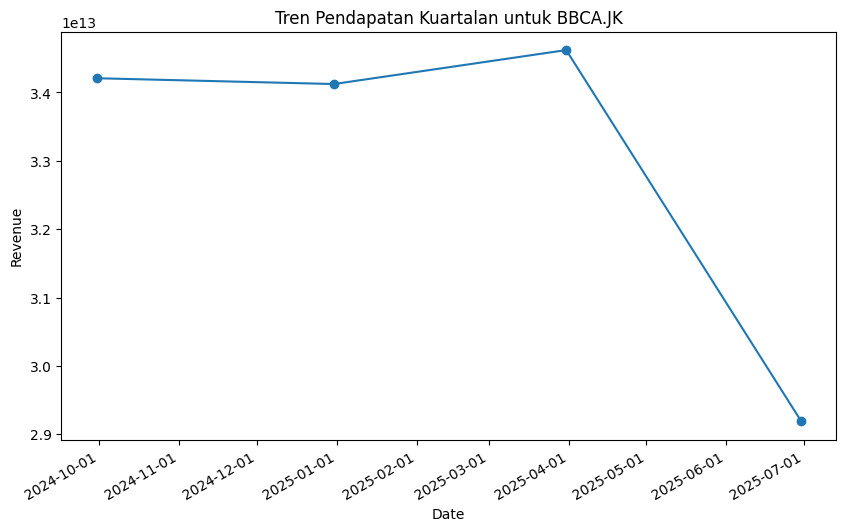

In [34]:
exec(clean_code)

## 4. 🔎 Interpreting Key Financial Trends

Mari kita minta LLM untuk menganalisis tren dari data revenue, laba bersih, dan arus kas operasional.

In [35]:
template_trend = PromptTemplate.from_template(
    """
    Bertindaklah sebagai seorang analis keuangan. 
    Perhatikan data keuangan kuartalan berikut:
    ---
    {data}
    ---
    Analisis tren utama yang muncul dari data tersebut. Fokus pada pergerakan **revenue, net_income, dan operating_cashflow** dari kuartal ke kuartal.
    Sajikan analisis Anda dalam 3 poin (bullet points). Tuliskan dengan bahasa singkat dan jelas.
    """
)

In [36]:
interpretasi_tren = llm.invoke(template_trend.format(data=financials.to_string(index=False)))

In [37]:
print("🔎 Interpretasi Tren oleh LLM:")
print(interpretasi_tren.content)

🔎 Interpretasi Tren oleh LLM:
Based on the provided financial data, here are three main trend analysis points:

• **Revenue**: The revenue has been consistently increasing from Q3 2024 to Q2 2025, with a slight dip in Q4 2024. The growth rate is around 5-6% quarter-over-quarter.

• **Net Income**: The net income has been volatile, with a significant drop in Q1 2025 and a rebound in Q2 2025. The net income growth rate is around 10-15% quarter-over-quarter, but with a high degree of variability.

• **Operating Cash Flow**: The operating cash flow has been consistently negative, with a significant increase in cash outflow in Q1 2025. This could indicate that the company is facing liquidity issues or investing heavily in its operations.


## 5. ⚠️ Detecting Potential Financial Risks

Kita juga bisa meminta LLM untuk mencari potensi risiko yang mungkin tersembunyi dalam laporan keuangan.

Seorang analis yang baik tidak hanya melihat sisi positif, tetapi juga potensi risiko. Mari kita suruh AI untuk menjadi "skeptis" dan mencari potensi masalah.

**✨Pro Tips**: Kita minta AI untuk berperan sebagai analis risiko dan mencari red flags spesifik. Ini akan menghasilkan jawaban yang lebih tajam dan tidak generik.

In [38]:
template_risk = PromptTemplate.from_template(
    """
    Anda adalah seorang analis risiko keuangan yang skeptis. 
    Periksa data keuangan berikut dengan teliti:
    ---
    {data}
    ---
    Identifikasi 2-3 potensi risiko atau "red flags" yang perlu diwaspadai dari data ini. Carilah hal-hal seperti penurunan margin, peningkatan utang, atau arus kas yang tidak sejalan dengan laba.
    Jelaskan setiap risiko dalam satu kalimat singkat.
    """
)

In [39]:
llm_risiko = llm.invoke(template_risk.format(data=financials.to_string(index=False)))

In [40]:
print("⚠️ Potensi Risiko:")
print(llm_risiko.content)

⚠️ Potensi Risiko:
As a skeptical financial risk analyst, I've identified 2-3 potential risks or "red flags" from the data:

1. **Decreasing net interest margin**: The net interest income as a percentage of total assets has been decreasing over the quarters, indicating a possible squeeze on the bank's profitability.
2. **Increasing non-performing loans**: The allowance for loans as a percentage of gross loans has been increasing, suggesting a potential rise in non-performing loans, which could lead to higher provisioning and lower earnings.
3. **Unstable cash flow**: The operating cash flow and free cash flow have been volatile, with large fluctuations between quarters, which may indicate a lack of stability in the bank's ability to generate cash and meet its financial obligations.

Each of these risks could have a significant impact on the bank's financial performance and stability, and therefore warrant further investigation and monitoring.
